In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow_addons as tfa
from nltk.corpus import stopwords
import gensim as gs
import re
import string
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier


 Configuração para GPU

In [2]:
devices = tf.config.experimental.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(devices[0], True)
    print("Success")
except:
    print("Exception occured")
    pass

Exception occured


In [3]:
df = pd.read_csv('../data/pre-processed.csv')
df = df.drop(columns=['index'])
df.isnull().any()

label                False
preprocessed_news    False
dtype: bool

In [4]:

stop_words = set(stopwords.words('portuguese'))

def remover_stop_words(news):
    palavras = news.split()
    palavras_sem_stop = [palavra for palavra in palavras if palavra.lower() not in stop_words]
    return ' '.join(palavras_sem_stop)

def review_cleaning(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df["preprocessed_news"] = df["preprocessed_news"].apply(remover_stop_words)
df["preprocessed_news"] = df["preprocessed_news"].apply(review_cleaning)

In [5]:
df['label'] = df.apply(lambda row: 0 if row.label == 'fake' else 1, axis=1)

X = df.drop(['label'], axis = 1)
Y = df['label']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify=Y)

X_train = X_train['preprocessed_news'].apply(lambda x: x.lower())
X_test = X_test['preprocessed_news'].apply(lambda x: x.lower())


vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()


In [7]:
#MLP
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train,y_train)

MLPClassifier(random_state=1)

X_test
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       976
           1       0.89      0.97      0.93       824

    accuracy                           0.93      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.93      0.93      0.93      1800



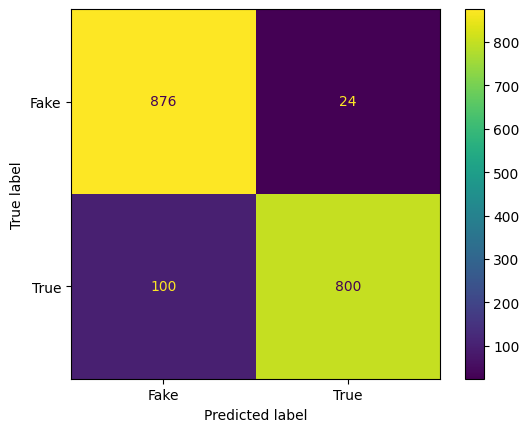

In [14]:
x_test_pred = mlp.predict(X_test)
print('X_test')
print(classification_report(x_test_pred,y_test))


x_test_pred = (x_test_pred > 0.75)
cm = confusion_matrix(y_test, x_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()



Model Testing

In [15]:
news = 'plebiscito criar novo pais estados sul sim votacao sim alcancou aprovacao consulta defende separacao rio grande sul santa catarina parana formacao novo pais processo ocorreu ultimo sabado cerca duas mil urnas coordenacao movimento alega mil pessoas participaram votacao novas consultas deverao realizadas ate movimento pretende levar proposta onu organizacao nacoes unidas leia tambem'
news2 = 'alvos operacao lava jato rio sao suspeitos receber cerca r milhoes propina mandado prisao cumprido contra petrobras alvo mandado prisao temporaria vai entregar nesta tarde petrobras pedro augusto cortes xavier bastos preso manha desta agentes policia federal durante fase operacao agentes tambem tentaram cumprir mandado prisao temporaria contra jose augusto ferreira santos nao localizado segundo pf santos vai entregar tarde desta sexta prisao bastos aconteceu rio janeiro acao batizada poco seco tambem realizada distrito federal sao paulo correcao publicada reportagem errou informar jose augusto ferreira santos preso verdade deve apresentar nesta tarde segundo delegado igor romario paula coordenador lava jato erro corrigido rio agentes cumpriram mandados tres enderecos barra tijuca zona oeste sao conrado zona sul contra bastos demitido justa causa petrobras cumprido mandado prisao preventiva contra santos ha mandado prisao temporaria segundo investigacoes area internacional empresa sao suspeitos terem recebido us milhoes cerca r milhoes propinas empresa companie beninoise des hydrocarbures sarl cbh outras cinco pessoas relacionadas total cinco contas mantidas suica estados unidos sao suspeitos terem recebido pagamentos ilicitos totalizaram us milhoes cerca r milhoes fatos podem configurar crimes corrupcao lavagem dinheiro evasao divisas todo expedidos mandados judiciais sendo oito busca apreensao prisao preventiva prisao temporaria tres mandados conducao coercitiva pessoa levada prestar depoimento empresa cbh pertence empresario portugues idalecio oliveira responsavel venda campo seco petroleo benin africa petrobras nesta quinta idalecio absolvido outro processo juiz sergio moro suspeito crimes corrupcao ativa lavagem dinheiro acordo decisao sentenca baseada falta provas processo segundo denuncia ministerio publico desencadeou fase acao pagamentos propina feitos efetivar venda campo petroleo intermediados lobista joao augusto rezende henriques operador pmdb esquema petrobras joao augusto preso desde setembro operacao lava jato condenado sete anos prisao corrupcao lavagem dinheiro decorrencia mesmos fatos outro processo naquele processo condenados tambem camara deputados eduardo cunha petrobras jorge luiz zelada operacao tambem relacao lobistas ligados pmdb jorge luz bruno luz pai filho operavam partido dentro petrobras ja estao presos complexo regiao curitiba pr presos durante fase lava jato fernanda luz filha jorge luz empresario alvaro gualberto teixeira mello fabio casalicchio sao alvos conducao coercitiva fernanda nao encontrada casa alvaro levado agentes sede pf volta casa presos pedro augusto jose augusto tambem cumpridos mandados busca apreensao nome fase poco seco referencia resultados negativos investimento realizado petrobras aquisicao direitos exploracao pocos petroleo benin investigados devem responder pratica crimes corrupcao fraude licitacoes evasao divisas lavagem dinheiro dentre outros prisao conducao coercitiva buscas investigacao comecou agosto partir cooperacao internacional suica documentos comprovaram pagamento subornos total us milhoes cerca r milhoes concretizar aquisicao petrobras campo petroleo benin us milhoes entanto investigacoes demonstram quase terco valor negocio pago propinas maio valor transacao us milhoes transferido empresa cbh mesma data us milhoes seguiram cbh lusitania petroleum ltd holding propriedade idalecio oliveira controla outras empresas propria cbh dois dias lusitania depositou favor offshore acona propriedade joao augusto rezende henriques us milhoes dar aparencia legitima transferencia propina celebrado contrato comissionamento acona lusitania'
news3 = 'plebiscito criar novo pais estados sul sim votacao sim alcancou aprovacao consulta defende separacao rio grande sul santa catarina parana formacao novo pais processo ocorreu ultimo sabado cerca duas mil urnas coordenacao movimento alega mil pessoas participaram votacao novas consultas deverao realizadas ate movimento pretende levar proposta onu organizacao nacoes unidas leia tambem'


news = pd.Series(name='1',data=[news])
news2 = pd.Series(name='1',data=[news2])
news3 = pd.Series(name='1',data=[news3])



df_news = pd.DataFrame(news)
x = df_news.iloc[1]

x_news = vectorizer.transform(df_news).toarray()
y_news = pd.Series(data=[0,1,0], index=[ 0,1,2],name='label')

x_test_pred = mlp.predict(X_test)
print('X_test')
print(classification_report(x_test_pred,y_test))


x_test_pred = (x_test_pred > 0.75)
cm = confusion_matrix(y_test, x_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()



IndexError: single positional indexer is out-of-bounds